In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
df = pd.read_csv("Students_Grading_Dataset.csv")

In [7]:
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [9]:
df.head(10)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
5,S1005,Liam,Brown,student5@university.com,Male,21,Engineering,NaN,78.85,43.53,...,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.60,66.26,89.07,...,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.91,45.67,73.96,...,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
8,S1008,Omar,Smith,student8@university.com,Female,21,CS,85.97,84.42,90.87,...,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
9,S1009,Sara,Smith,student9@university.com,Female,22,Engineering,64.01,87.96,98.47,...,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)


In [38]:
df.head(20)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
5,Male,21,Engineering,NaN,78.85,43.53,71.40,52.20,6.38,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,Male,24,Business,57.60,66.26,89.07,84.52,98.40,2.30,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,Male,19,Engineering,51.91,45.67,73.96,80.12,95.90,3.73,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
8,Female,21,CS,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
9,Female,22,Engineering,64.01,87.96,98.47,96.98,55.63,5.88,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4


handeling Missing Value:

In [42]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [46]:
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home',
                    'Parent_Education_Level', 'Family_Income_Level', 'Grade']
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

In [48]:
categorical_cols

['Gender',
 'Department',
 'Extracurricular_Activities',
 'Internet_Access_at_Home',
 'Parent_Education_Level',
 'Family_Income_Level',
 'Grade']

In [50]:
label_encoders

{'Gender': LabelEncoder(),
 'Department': LabelEncoder(),
 'Extracurricular_Activities': LabelEncoder(),
 'Internet_Access_at_Home': LabelEncoder(),
 'Parent_Education_Level': LabelEncoder(),
 'Family_Income_Level': LabelEncoder(),
 'Grade': LabelEncoder()}

In [52]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 
                  'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 
                  'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

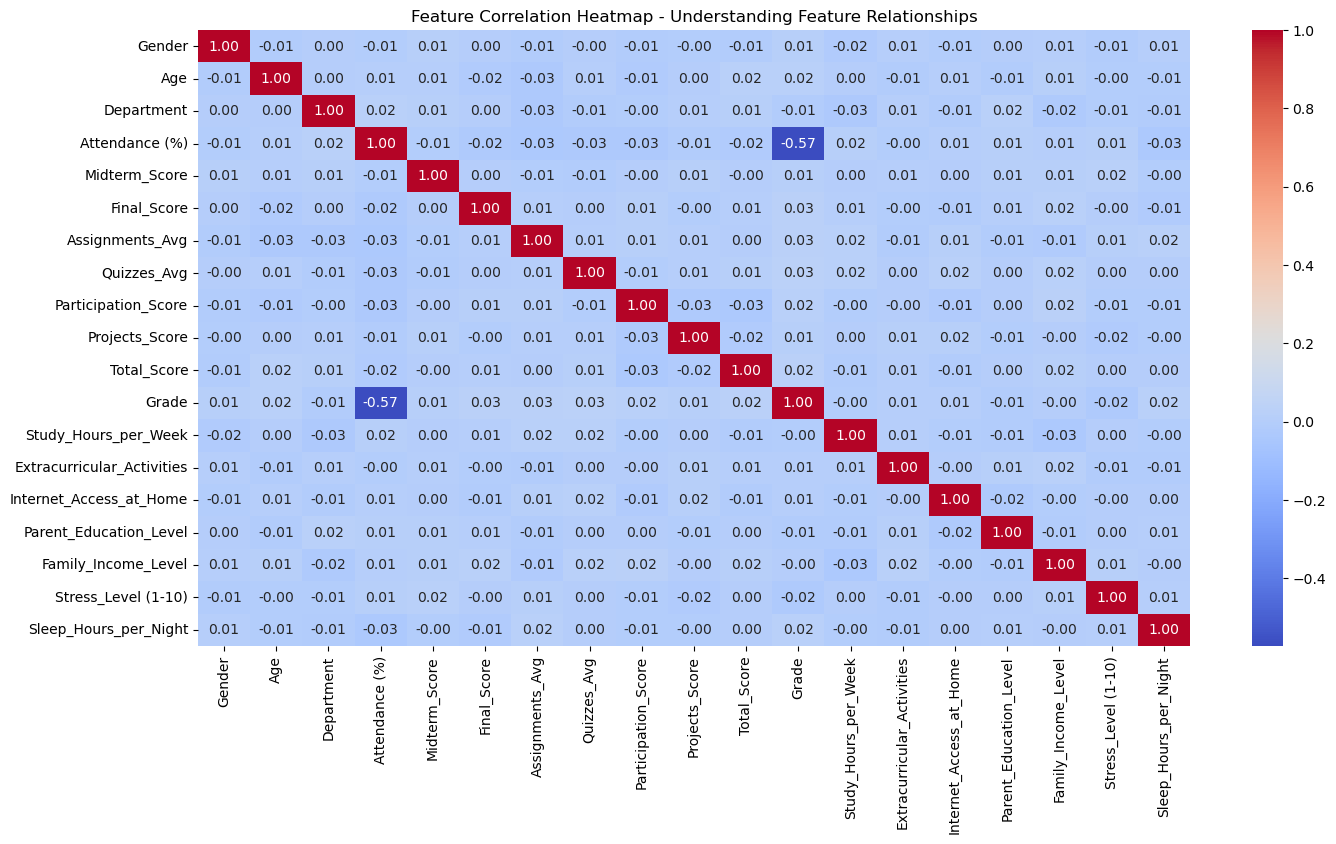

In [54]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap - Understanding Feature Relationships")
plt.show()

Grade Distribution

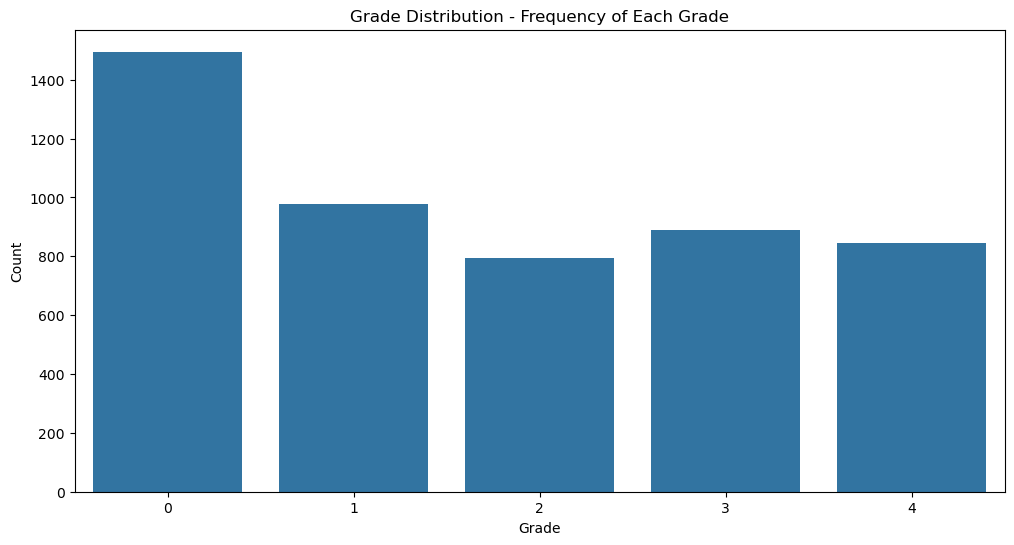

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['Grade'])
plt.title("Grade Distribution - Frequency of Each Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

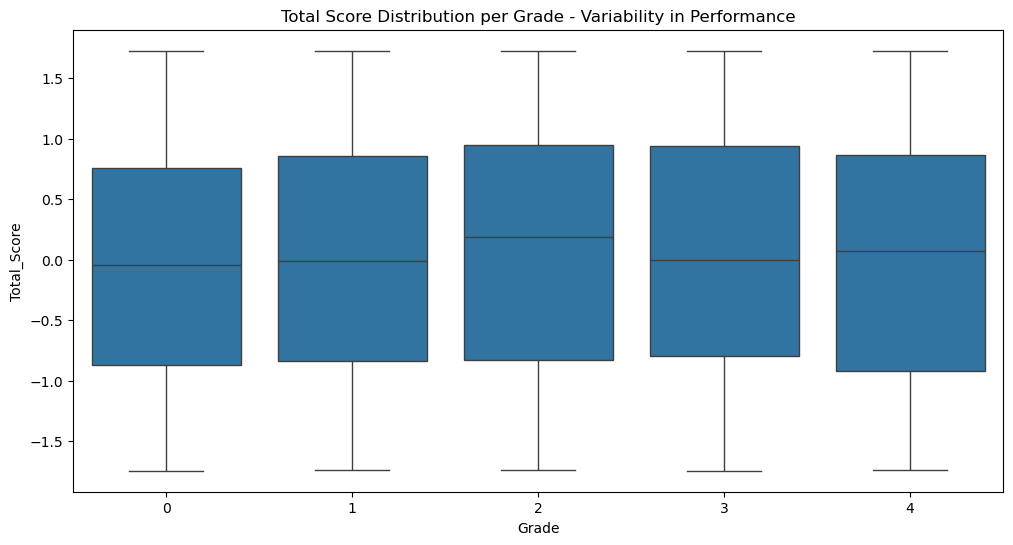

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Grade'], y=df['Total_Score'])
plt.title("Total Score Distribution per Grade - Variability in Performance")
plt.show()

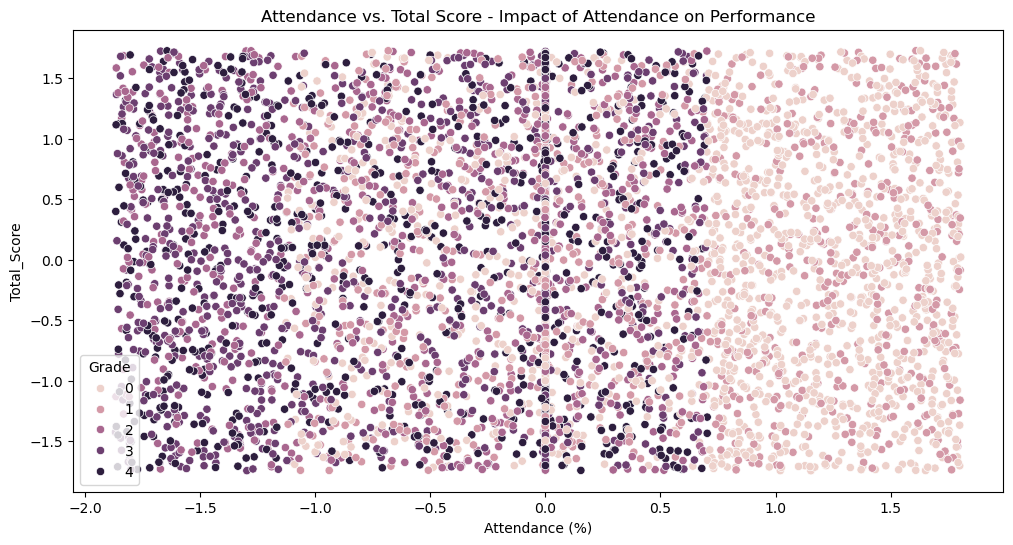

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Attendance (%)'], y=df['Total_Score'], hue=df['Grade'])
plt.title("Attendance vs. Total Score - Impact of Attendance on Performance")
plt.show()

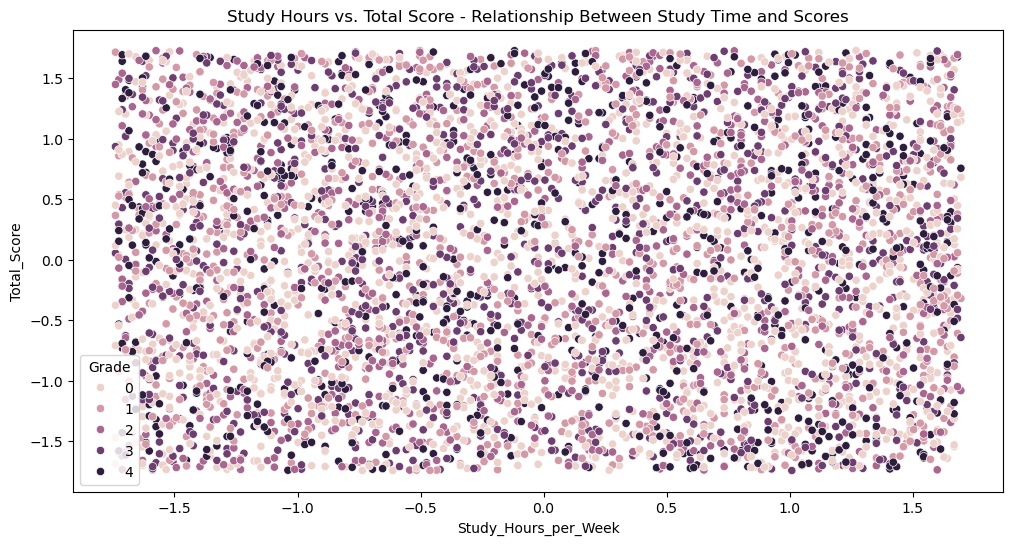

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Total_Score'], hue=df['Grade'])
plt.title("Study Hours vs. Total Score - Relationship Between Study Time and Scores")
plt.show()

ML & DL Model Evaluation

In [68]:
X = df.drop(columns=['Grade'])
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=539, stratify=y) 

In [70]:
X

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,0.478290,2,-1.700434,-0.888758,-0.685779,6.904670e-01,-0.058659,-0.342587,0.761001,-1.321791,-1.575071,0,1,1,2,-0.168038,-1.231384
1,1,-1.532177,2,1.604703,1.563093,-1.383115,1.041480e-15,1.332793,1.155762,-1.336493,-1.700302,0.184346,0,1,3,2,-0.517534,1.729766
2,1,1.483524,0,-1.340381,-0.190387,1.394627,-5.202451e-01,0.743943,0.024214,-0.078690,-0.334882,0.418018,0,1,2,1,0.181458,-0.198425
3,0,1.483524,3,1.448925,-1.309407,0.637535,-6.404369e-01,1.282458,0.539813,1.192288,-0.937028,0.981582,1,1,1,0,-0.867029,0.145895
4,0,0.980907,1,-1.561556,-1.379128,0.536590,1.616090e+00,0.606038,0.342570,-0.451038,-0.624496,-0.310490,1,1,1,0,-1.216525,0.421351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,-1.029560,0,0.000000,0.686934,-0.540162,3.877890e-01,1.683070,0.006912,-1.144425,0.700642,1.077800,0,1,1,1,1.579442,1.247719
4996,1,-1.029560,0,-0.758419,0.928633,-1.151057,1.041480e-15,0.908048,-0.757834,-0.974545,1.447248,-1.740017,0,1,3,2,-0.517534,-1.713432
4997,0,1.483524,1,0.889741,-0.393740,-0.315065,1.427741e+00,-1.704545,-0.640181,0.535651,-1.449582,0.981582,1,0,1,2,-0.517534,-0.129561
4998,1,0.980907,1,1.258611,0.549816,1.429436,4.691383e-01,-0.946762,-1.584867,1.342753,-1.339154,-0.214272,1,1,0,1,-1.566021,1.316583


In [72]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state=42),
    "Gradient Booting": GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [74]:
ml_results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    execution_time = end_time - start_time
    ml_results.append([name, accuracy, r2, execution_time])

In [76]:
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
dl_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)
duration = time.time() - start_time
dl_loss, dl_accuracy = dl_model.evaluate(X_test, y_test, verbose=0)
ml_results.append(["Deep Learning Model", dl_accuracy, None, duration])

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\ishau\AppData\Local\Temp\ipykernel_65312\1149289478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


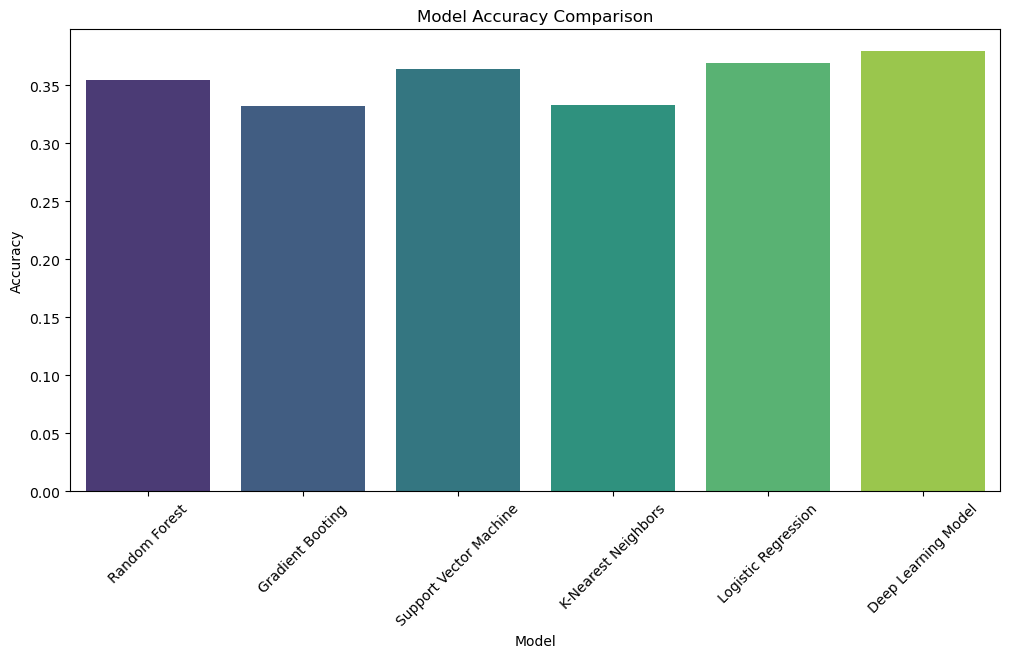

In [78]:
results_df = pd.DataFrame(ml_results, columns=["Model", "Accuracy", "R2 Score", "Execution Time (s)"])
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

C:\Users\ishau\AppData\Local\Temp\ipykernel_65312\953605835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Execution Time (s)", data=results_df, palette="coolwarm")


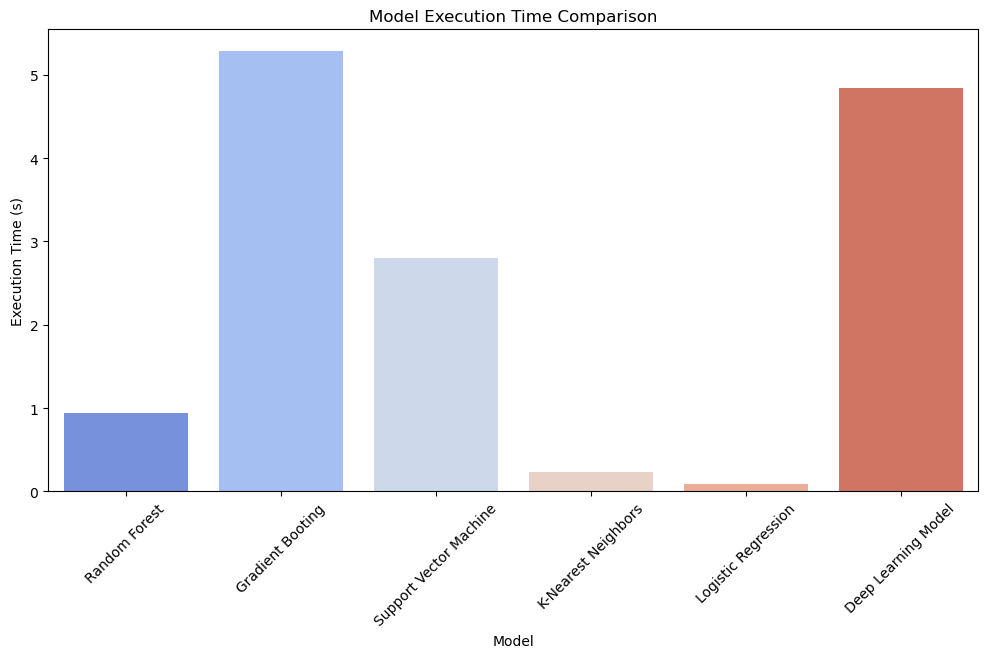

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Execution Time (s)", data=results_df, palette="coolwarm")
plt.title("Model Execution Time Comparison")
plt.xticks(rotation=45)
plt.show()

In [84]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [85]:
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
ml_results.append(["Optimized Random Forest", best_accuracy, best_r2, None])

In [88]:
results_df = pd.DataFrame(ml_results, columns=["Model", "Accuracy", "R2 Score", "Execution Time (s)"])
results_df

,Model,Accuracy,R2 Score,Execution Time (s)
0,Random Forest,0.354,-0.154837,0.939968
1,Gradient Booting,0.332,-0.172824,5.281411
2,Support Vector Machine,0.364,-0.250305,2.795387
3,K-Nearest Neighbors,0.333,-0.381746,0.235118
4,Logistic Regression,0.369,-0.289046,0.090755
5,Deep Learning Model,0.379,NaN,4.842246
6,Optimized Random Forest,0.365,-0.095343,NaN


In [91]:
import pickle

In [93]:
with open("random_forest.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [95]:
dl_model.save("deep_learning_model.h5")

In [ ]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)